<a href="https://colab.research.google.com/github/Neil-Cardoz/Deep-Learning/blob/main/MINST_classification_using_tensorflow_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras import models, layers

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Validation labels shape: {y_val.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (48000, 28, 28)
Training labels shape: (48000,)
Validation data shape: (12000, 28, 28)
Validation labels shape: (12000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [2]:
train_images, text_images = x_train / 255.0, x_test / 255.0

resnet (227*227), googlenet, vggnet

In [3]:
model = models.Sequential([
    #Convoultion 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    #Convolution 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #Convolution 3
    layers.Conv2D(64, (3, 3), activation='relu'),

    #Flatten and fully connected
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val), batch_size=64)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8284 - loss: 1.6525 - val_accuracy: 0.9737 - val_loss: 0.0957
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9774 - loss: 0.0748 - val_accuracy: 0.9809 - val_loss: 0.0678
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9841 - loss: 0.0487 - val_accuracy: 0.9797 - val_loss: 0.0714
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9879 - loss: 0.0358 - val_accuracy: 0.9842 - val_loss: 0.0631
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9905 - loss: 0.0307 - val_accuracy: 0.9832 - val_loss: 0.0626


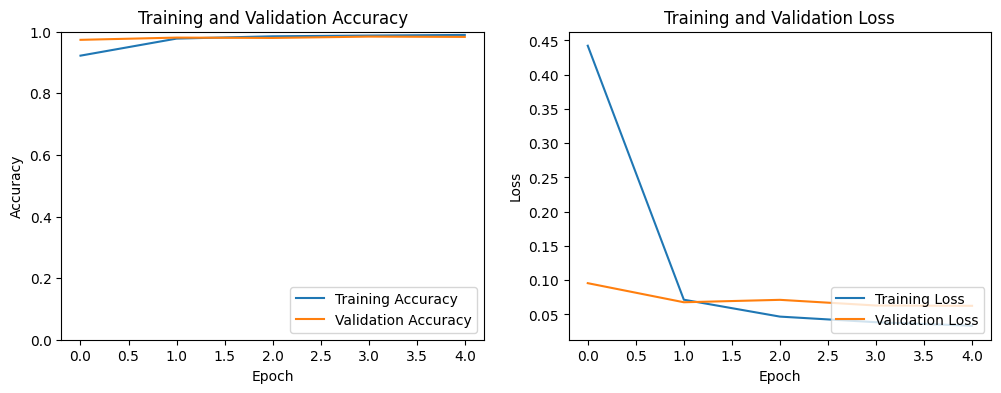

In [14]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()